In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
"""
Load UCI ML Iris data
Return: data(shape = (150, 4)) and labels(shape = (150, 1)) in numpy array(rank 2)
"""
def load_data(classes):
    data = pd.read_csv('Iris.csv', index_col=0).as_matrix()
    features = data[:, :-1]
    labels = data[:, -1].reshape(-1, 1)
    for class_id in classes:
        labels[labels == class_id[0]] = class_id[1]
    return features.astype(np.float32), labels.astype(np.float32)

In [3]:
"""
Initialize the univariate GMM parameters
"""
def params_init():
    means = np.array([1., 4., 6.], dtype=np.float32)
    variances = np.array([1., 1., 1.], dtype=np.float32)
    alphas = np.array([0.5, 0.25, 0.25], dtype=np.float32)
    return means, variances, alphas

In [4]:
"""
Get the probability density from univariate gaussian distribution
"""
def get_gauss(x, mean, sigma):
    gauss_x = (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-(np.square(x - mean) / (2 * sigma)))
    return gauss_x.astype(np.float32)

In [5]:
"""
Univariate Gaussian Mixture Model
"""
def uni_gmm(features, means, variances, alphas, epoch, k, epsilon=10e-6):
    log_likelihood_history = list()
    
    #Define the function for calculating weighted probability densities for all data according to clusters#
    def get_probden():
        return np.multiply(alphas, get_gauss(features, means, np.sqrt(variances)))
    
    #Compute the log-likelihood for the initial state#
    total_prob_den = get_probden()
    log_likelihood_history.append(np.sum(np.log(np.sum(total_prob_den, axis=1)), axis=0))
    
    #Start EM Algorithm#
    for i in range(epoch):
        #Expectation step#
        p = np.divide(total_prob_den, np.sum(total_prob_den, axis=1, keepdims=True))

        #Maximization step#
        alphas = (np.sum(p, axis=0) + epsilon) / features.shape[0]
        means = np.multiply((1 / (np.sum(p, axis=0) + epsilon)), np.sum(np.multiply(p, features), axis=0))
        variances = np.multiply((1 / (np.sum(p, axis=0) + epsilon)), np.sum(np.multiply(p, np.square(features - means))))
        total_prob_den = get_probden()
        log_likelihood_history.append(np.sum(np.log(np.sum(total_prob_den, axis=1)), axis=0))
    return means, variances, alphas, log_likelihood_history

In [6]:
"""
Return number of members in each cluster if hard clustering
"""
def hard_cluster_num_members(features, alphas, means, variances):
    p = np.multiply(alphas, get_gauss(features, means, np.sqrt(variances)))
    belong = np.argmax(p, axis=1)
    clusters_name, num_members = np.unique(belong, return_counts=True)
    return clusters_name, num_members

In [7]:
"""
Plot the scatter graphs with univariate Gaussian Mixture Model
"""
def plot_scatter(features, labels, plot_GMM=False, GMM_mean=None, GMM_var=None, GMM_alpha=None):        
    plt.plot(features[labels == float(0)], np.zeros_like(features[labels == float(0)]), 'rx', label='Iris-setosa')
    plt.plot(features[labels == float(1)], np.zeros_like(features[labels == float(1)]), 'gx', label='Iris-versicolor')
    plt.plot(features[labels == float(2)], np.zeros_like(features[labels == float(2)]), 'bx', label='Iris-virginica')
    if plot_GMM:
        x = np.arange(np.amin(features) - 1., np.amax(features) + 1., 0.1)
        plt.plot(x, alphas[0] * get_gauss(x, means[0], np.sqrt(variances[0])), 'k')
        plt.plot(x, alphas[1] * get_gauss(x, means[1], np.sqrt(variances[1])), 'k')
        plt.plot(x, alphas[2] * get_gauss(x, means[2], np.sqrt(variances[2])), 'k')
    plt.title('Petal Length {}'.format(('with GMM' if plot_GMM else '')))
    plt.legend(loc='best')
    plt.show()

In [8]:
"""
Settings
"""
classes = [('Iris-setosa', 0), ('Iris-versicolor', 1), ('Iris-virginica', 2)]
epoch = 3000
k = 3

The initial state:


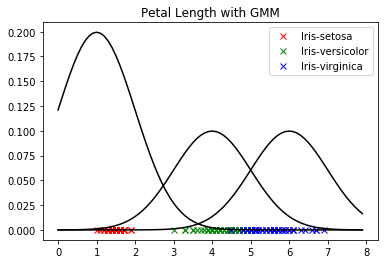

State after performing GMM:


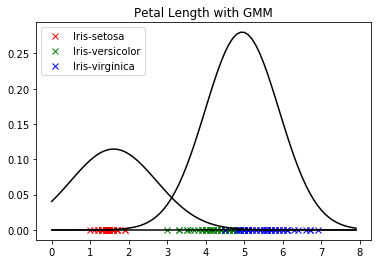

After 3000 epochs, the parameters are as follow:
Means: [1.6074963e+00 4.9435172e+00 3.2133581e-03]
Variances: [1.5305580e+00 8.4302324e-01 8.1465505e+06]
Alphas: [3.551694e-01 6.448308e-01 6.672853e-08]

If we use hard clustering, the number of members in each cluster:
Cluster 0: 51
Cluster 1: 99
There is no member in Cluster [2]


In [9]:
features, labels = load_data(classes)
features = features[:, 2].reshape(-1, 1)
means, variances, alphas = params_init()
print('The initial state:')
plot_scatter(features, labels, plot_GMM=True, GMM_mean=means, GMM_var=variances, GMM_alpha=alphas)
means, variances, alphas, log_likelihood_history = uni_gmm(features, means, variances, alphas, epoch, k)
print('State after performing GMM:')
plot_scatter(features, labels, plot_GMM=True, GMM_mean=means, GMM_var=variances, GMM_alpha=alphas)
print('After {} epochs, the parameters are as follow:'.format(epoch))
print('Means: {}'.format(means))
print('Variances: {}'.format(variances))
print('Alphas: {}'.format(alphas))
print()
clusters_name, num_members = hard_cluster_num_members(features, alphas, means, variances)
no_member_cluster = [x for x in list(np.arange(k)) if x not in list(clusters_name)]
print('If we use hard clustering, the number of members in each cluster:')
for i in range(clusters_name.shape[0]):
    print('Cluster {}: {}'.format(clusters_name[i], num_members[i]))
print('There is no member in Cluster {}'.format(no_member_cluster))